### Cena 1
- Simulação com a mini câmara sem material.
- Aplicando impedância de superfície calculada apartir da formulação da ISO 354.


### Importando bibliotecas


In [1]:
# Importando bibliotecas

import femder as fd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from femder.FEM_3D import  p2SPL

Default Plotly renderer: jupyterlab


### Importando resultados experimentais
- velocidade de volume
- coef. absorção ISO 354
- sinal medido nos receptores
- respostas impulsivas

In [2]:
import scipy.io as sio

q = sio.loadmat(r'D:\\Meu Drive\\TCC\\Simulacao_computacional\\Qi.mat')
# sorted(q.keys())
q = q['Qi']

as_medido = sio.loadmat(r'D:\\Meu Drive\\TCC\\Experimental\\sem_material\\as_vazia.mat')
# sorted(as_medido.keys())

R_semMat = sio.loadmat(r'D:\\Meu Drive\\TCC\\Experimental\\Medicao_tcc2\\Dados_medicao\\R_semMatfreq.mat')
# sorted(R_semMat.keys())

RI_semMat = sio.loadmat(r'D:\\Meu Drive\\TCC\\Experimental\\sem_material\\RIs.mat')



In [7]:
q.ravel().shape

(3701,)

In [35]:
AP = fd.AirProperties(c0 = 343)
fmax = 2000 #2300
fmin = 150
AC1 = fd.AlgControls(AP,fmin,fmax,0.5)
i=np.argwhere(AC1.freq==1000.5)[0,0]
f=np.argwhere(AC1.freq==2000)[0,0]

### Importar geometria, inicializando as classes dos dados de entrada da simulação

In [18]:
# Importar geometria, inicializando as classes dos dados de entrada da simulação

path_to_geo = "D:\Meu Drive\TCC\Simulacao_computacional\codes\geo\minicamara_menor\minicamara_volmenor_Fonte.iges"

AP = fd.AirProperties(c0 = 343)
fmax = 2000 #2300
fmin = 1000.5
AC = fd.AlgControls(AP,fmin,fmax,0.5)
#AC = fd.AlgControls(AP,fmin,fmax,1)
S = fd.Source("spherical")
S.coord = np.array([[1.23,0.14,0.1]])
#S.q = np.array(q[0,:1700]) #até 500 Hz
S.q = np.array(q.ravel()[i:f]) 
R = fd.Receiver()
#R.coord = np.array([[0.33,0.23,0.21],[0.38,0.93,0.21],[0.92,0.95,0.21]]) 
R.coord = np.array([[1.057,0.695,0.282],[0.425,0.925,0.235],
                    [0.409,0.406,0.235],[0.336,0.677,0.282],
                    [0.685,0.965,0.235],[0.661,0.30,0.235]])
 

In [3]:
# with open('G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\cena1\sup_admittance150-2K.pkl', "wb") as arquivo:
#     pickle.dump(sup, arquivo)

# import pickle
with open("G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\cena1\sup_admittance150-2K.pkl","rb") as arquivo:
  sup = pickle.load(arquivo)

In [19]:
# Boundary Conditions
BC = fd.BC(AC,AP) #[2,3,4,5,6,7]
BC.normalized_admittance(list(np.arange(2,13,1)),0.004)#sup.admittance)

### Verificação da equivalência entre os alphas (in x recuperado)

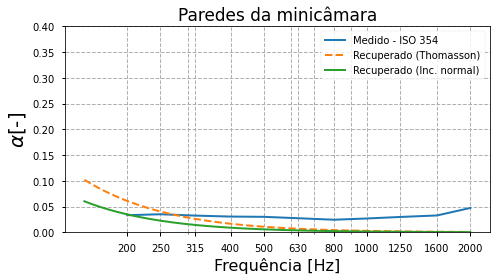

In [72]:
# Verificação da equivalência entre os coefs 
## () analisar recuperando com alphas em bando de terç de oitava
## () calcular erro entre os coefs
z_ar = AP.c0*AP.rho0
Zs = sup.surface_impedance/z_ar
Reflexao = (Zs - 1) / (Zs + 1)
Absorcao = 1 - (np.abs(Reflexao) ** 2)  # 1 - |R|²
plt.figure(figsize=(7,4))
plt.semilogx(as_medido['f'][:11], as_medido['a_s'][:11], linestyle='-', label = 'Medido - ISO 354',linewidth=2)
plt.semilogx(AC.freq, sup.statistical_alpha,label='Recuperado (Thomasson)', linestyle='--', linewidth=2)
plt.semilogx(AC.freq, Absorcao, linestyle='-', label = 'Recuperado (Inc. normal)',linewidth=2)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.title('Paredes da minicâmara', fontsize=17)
plt.xlabel('Frequência [Hz]', fontsize=16)
plt.ylabel(r'$\alpha$[-]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
plt.tight_layout()
plt.ylim((0,0.4))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
plt.show()

### Geração da malha, inicializando a classe FEM3D com os dados de entrada e o plote da geomeria com a malha 2D


In [25]:
grid = fd.GridImport3D(AP,path_to_geo,S,R,fmax = fmax,num_freq=6,scale=1000,order=1,load_method='meshio')
obj = fd.FEM3D(grid,S,R,AP,AC,BC)
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

### Cálculo das pressões com o método de elementos finitos

In [26]:
obj.compute() # debug e comparar vel const e dpendente freqa
obj.evaluate(R)

FEM | Assembling surface matrix: 100%|█████████████████████████| 11/11 [00:00<00:00, 34.73it/s]
100%|██████████| 2000/2000 [1:06:12<00:00,  1.99s/it]


Time taken: 66.28659290075302 min


array([[-0.61573101-0.24106035j,  0.41274121+0.17848163j,
         0.70770042+0.2658362j , -0.91211169-0.37115073j,
         0.22568209+0.00993197j,  0.012398  -0.20493431j],
       [-0.60298221-0.20187613j,  0.42914807+0.05359407j,
         0.72492626+0.17991133j, -0.87795432-0.32365069j,
         0.23241958-0.06136702j,  0.04887975-0.16634467j],
       [-0.59066705-0.19437697j,  0.42209703-0.07206511j,
         0.73094932+0.11562307j, -0.85641543-0.3202646j ,
         0.23174881-0.15366984j,  0.08228572-0.15550133j],
       ...,
       [-1.03451846-1.15705169j,  1.47224893-0.26651983j,
         0.59015962-0.46041586j, -1.5574587 -0.07103379j,
         1.42389526-0.99613215j,  0.17884179-1.69115675j],
       [-1.14466608-0.88868179j,  0.9611674 -0.35928923j,
         0.62129135-0.68696557j, -1.34146727+0.06148795j,
         0.68149005-1.50179929j,  0.17237386-1.97522475j],
       [-1.13555223-0.6760541j ,  0.5410714 -0.10119541j,
         0.49225049-0.94167678j, -1.17213503+0.08494016

In [27]:
# Salva var
with open("D:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_semMat\\0_004_obj_1k_2k_0_5.pkl", "wb") as arquivo:
    pickle.dump(obj, arquivo)


### Plote dos NPS resultantes em cada receptor

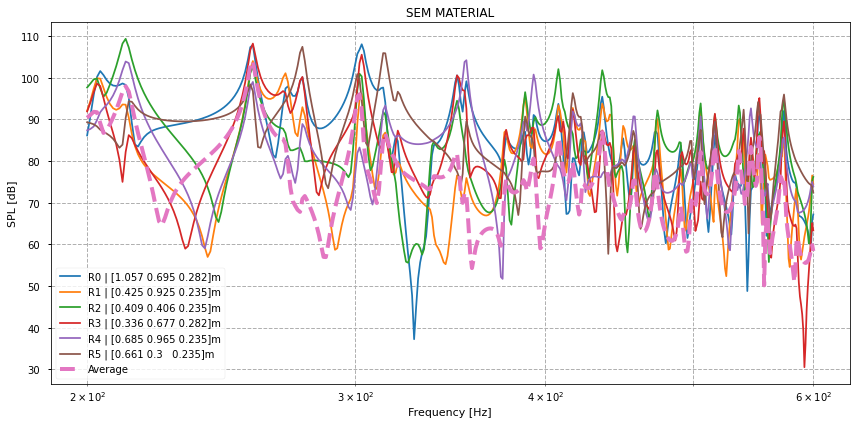

In [25]:
# Plote dos NPS resultantes em cada receptor
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj.R.coord)==1:
  plt.semilogx(obj.freq, p2SPL(obj.pR), linestyle='-', label=f'R | {obj.R.coord[0]}m')
else:
  for i in range(len(obj.R.coord)):
      plt.semilogx(obj.freq, p2SPL(obj.pR[:,i]), linestyle='-', label=f'R{i} | {obj.R.coord[i,:]}m')

if len(obj.R.coord) > 1:
  pR_med = np.mean(obj.pR,axis=1)
  plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
plt.title('SEM MATERIAL')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Comparação NPS dos pontos medido e simulado

In [28]:
with open("D:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_semMat\\0_004_obj_150_600_0_5.pkl","rb") as arquivo:
  obj1 = pickle.load(arquivo)

with open("D:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_semMat\\0_004_obj_600_1k_0_5.pkl","rb") as arquivo:
  obj2 = pickle.load(arquivo)

with open("D:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_semMat\\0_004_obj_1k_2k_0_5.pkl","rb") as arquivo:
  obj3 = pickle.load(arquivo)

In [31]:
pR = np.concatenate((obj1.pR,obj2.pR,obj3.pR))

In [30]:
R_semMat['freqVector'][1980:26401,0]

array([ 150.        ,  150.07575758,  150.15151515, ..., 1999.84848485,
       1999.92424242, 2000.        ])

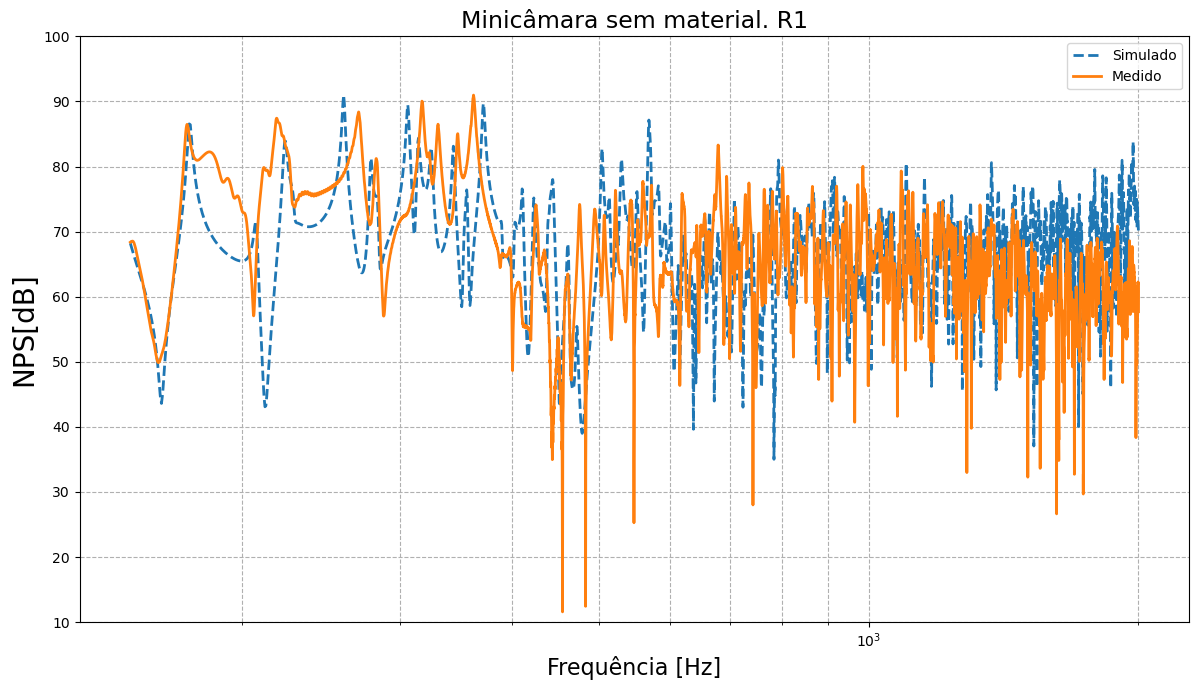

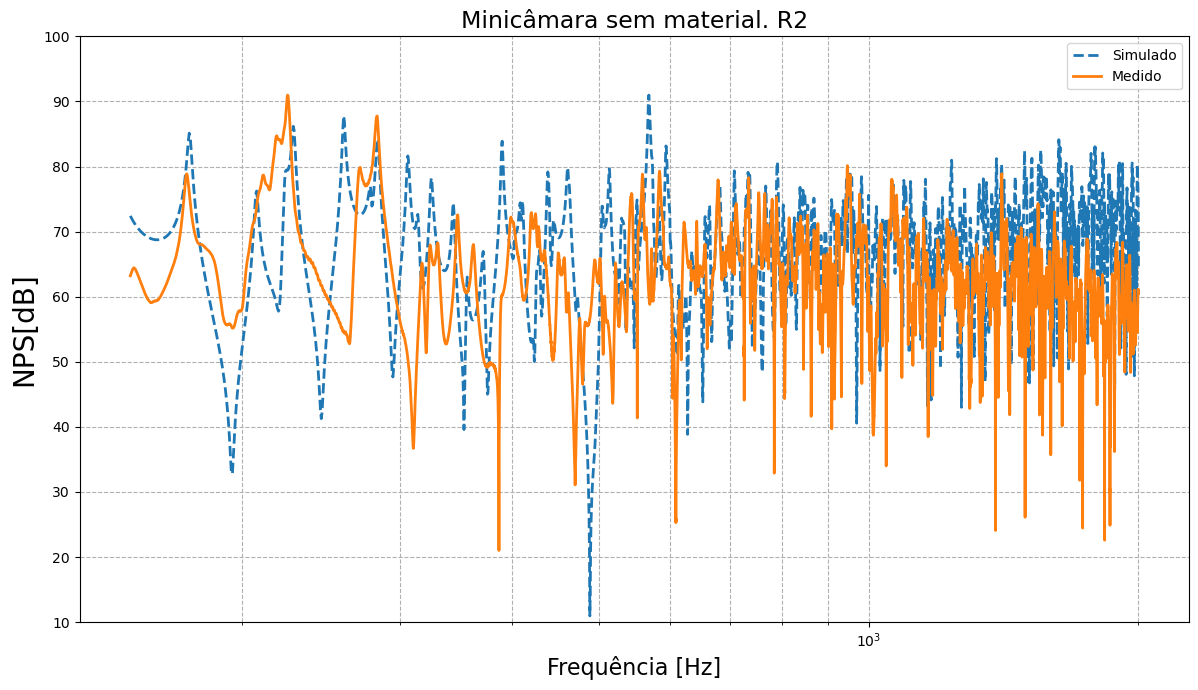

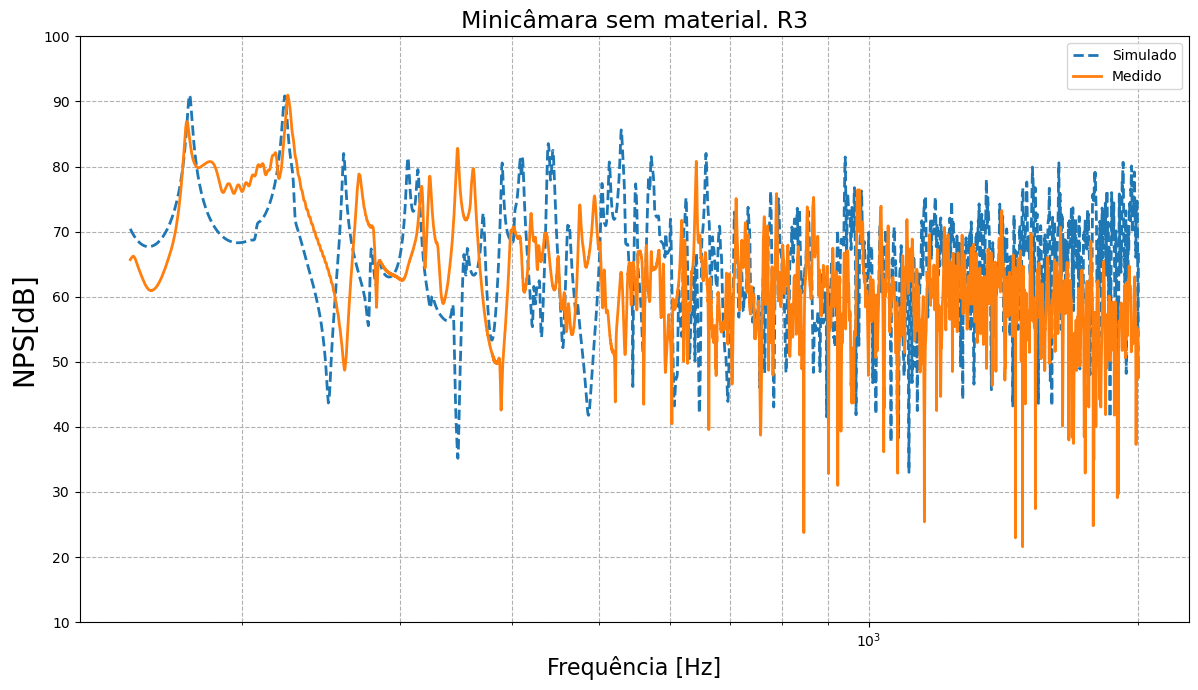

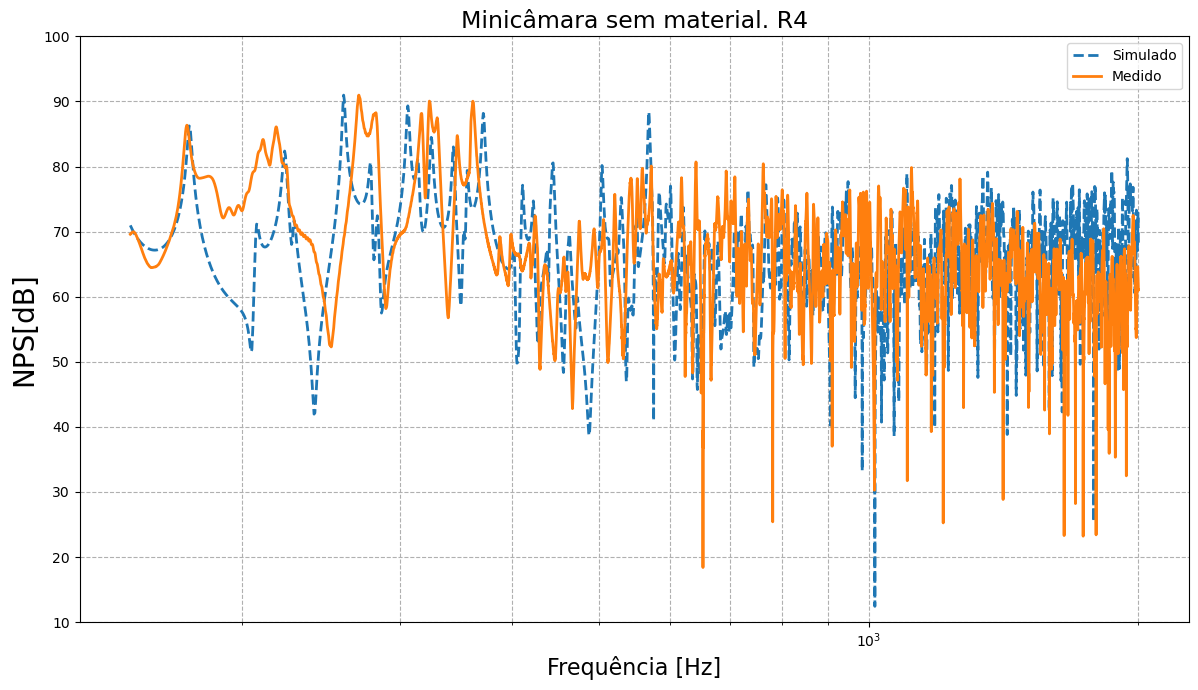

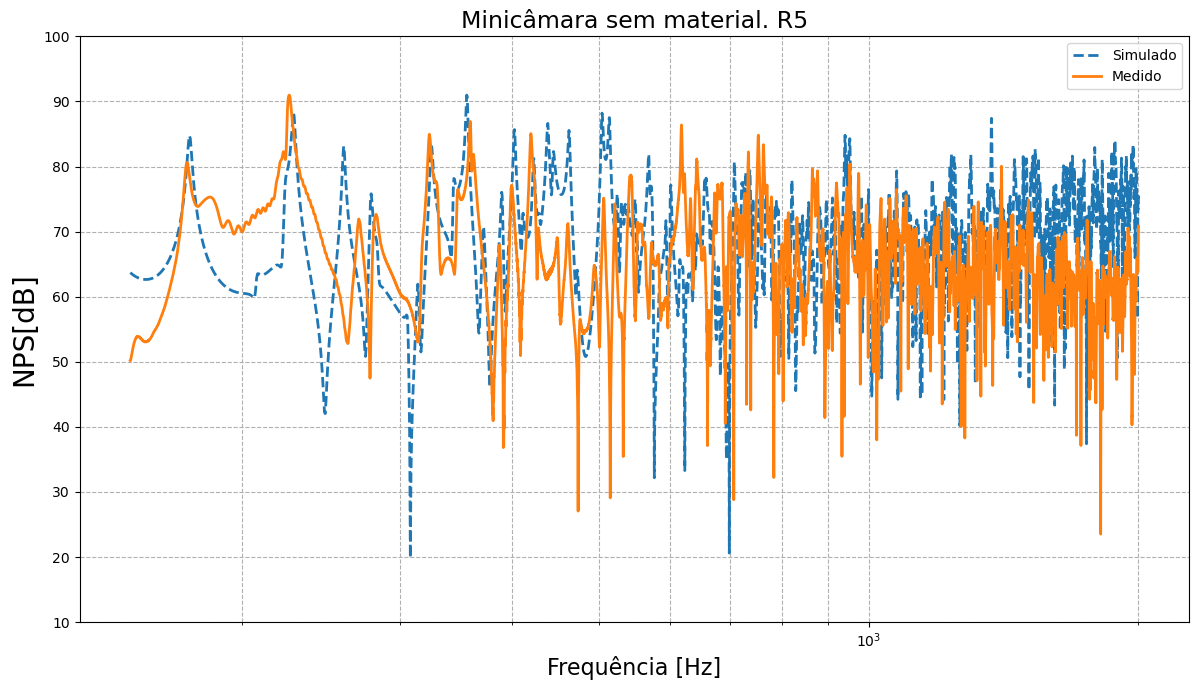

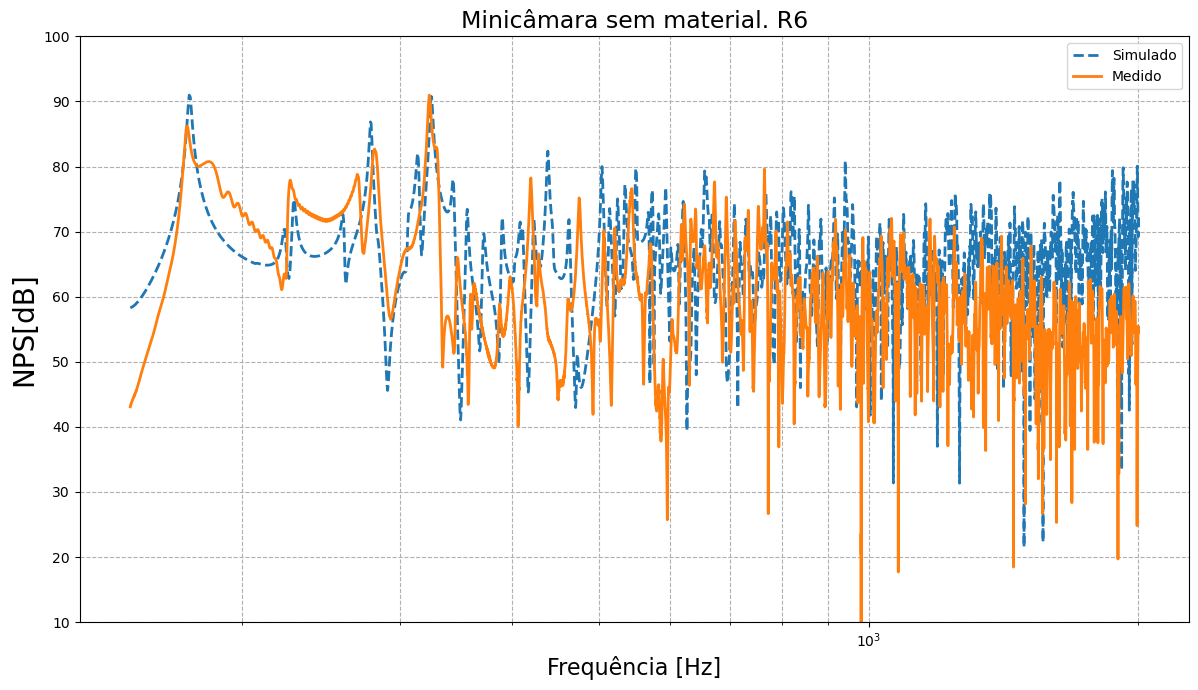

In [33]:
for n in range(0,6): # Admitancia = 0.004
    plt.figure(figsize=(12,7))
    plt.semilogx(AC1.freq, p2SPL(pR[:,n]/max(abs(pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_semMat['freqVector'][1980:26401,0], p2SPL(R_semMat['R_semMatfreq'][1980:26401,n]/max(abs(R_semMat['R_semMatfreq'][1980:26401,n]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show() 

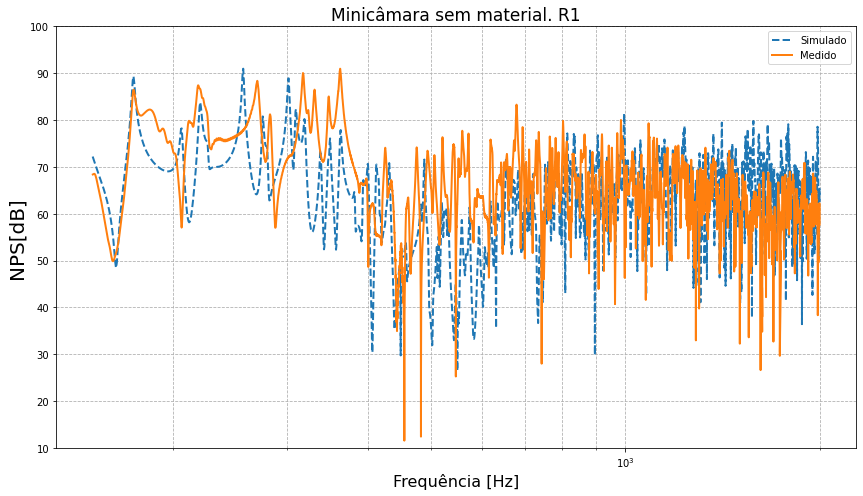

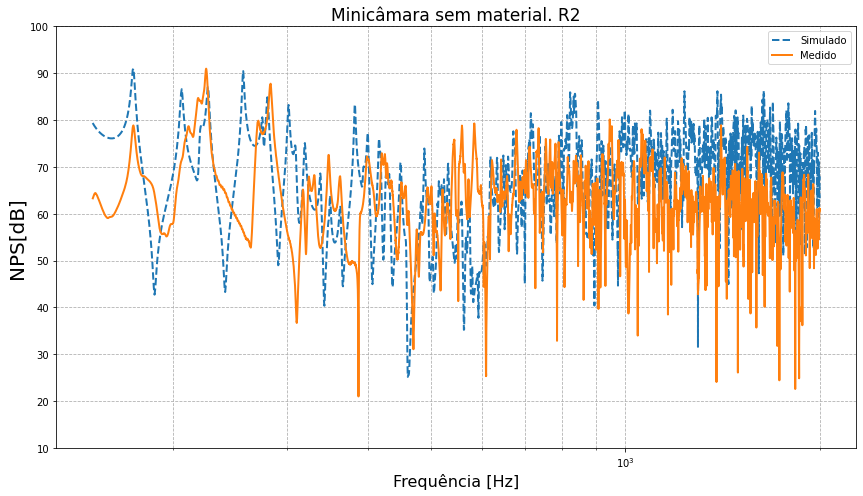

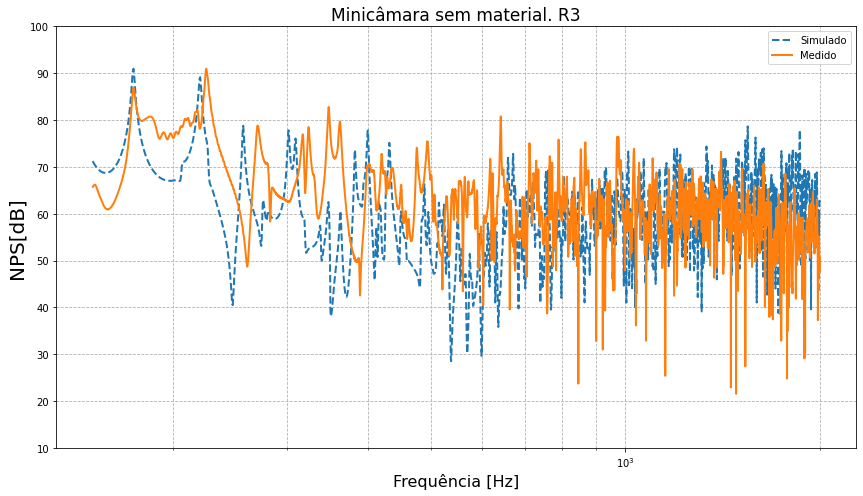

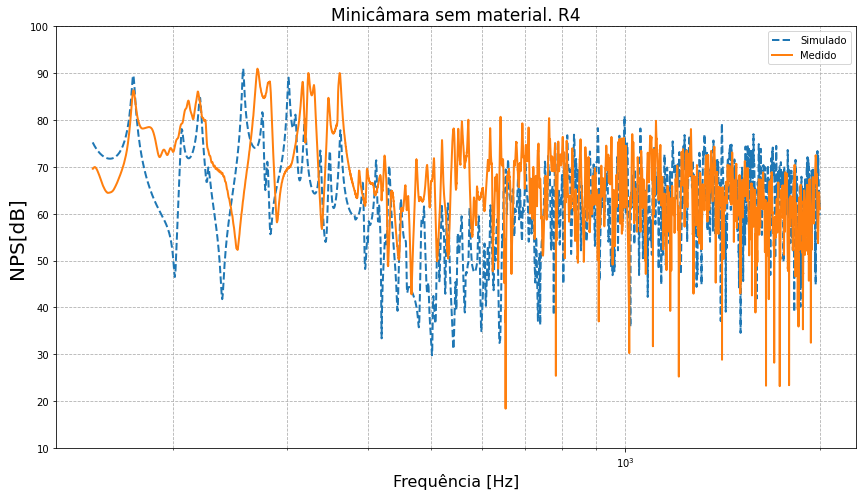

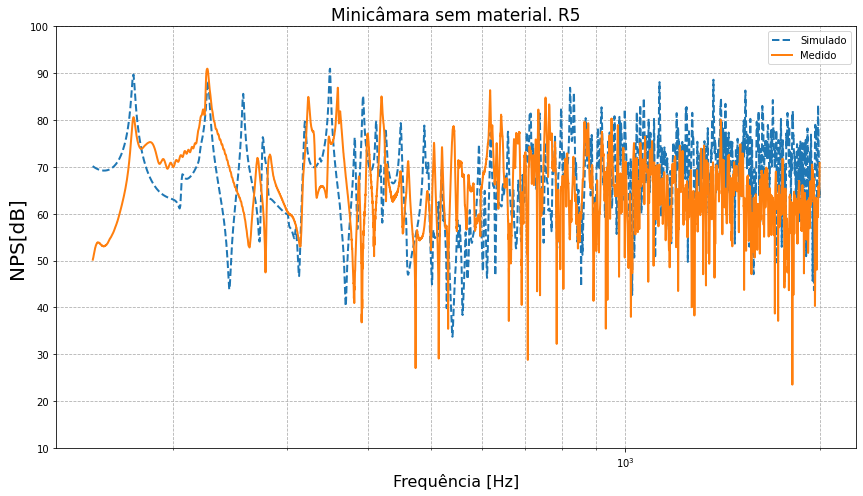

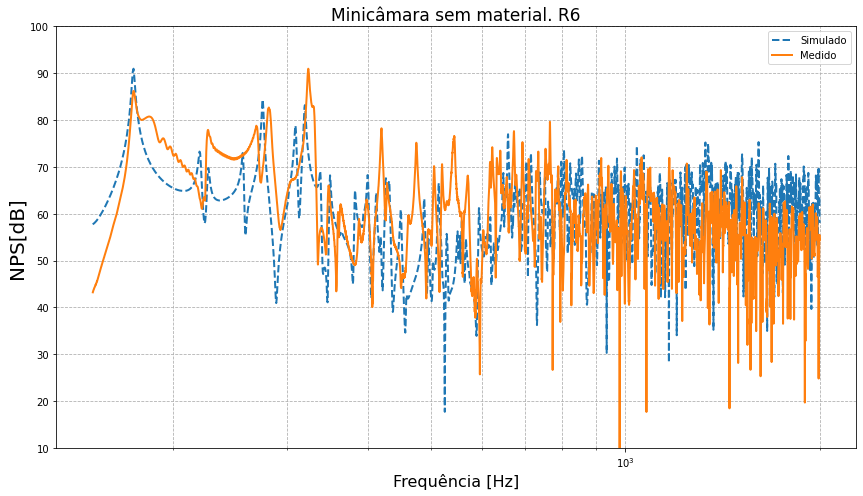

In [181]:
for n in range(0,6): # Admitancia = 0.004
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(pR[:,n]/max(abs(pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_semMat['freqVector'][1980:26401,0], p2SPL(R_semMat['R_semMatfreq'][1980:26401,n]/max(abs(R_semMat['R_semMatfreq'][1980:26401,n]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show() 

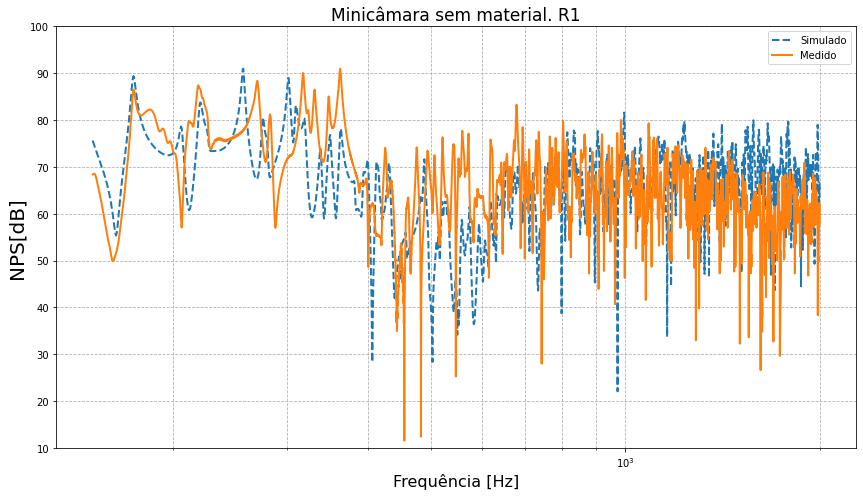

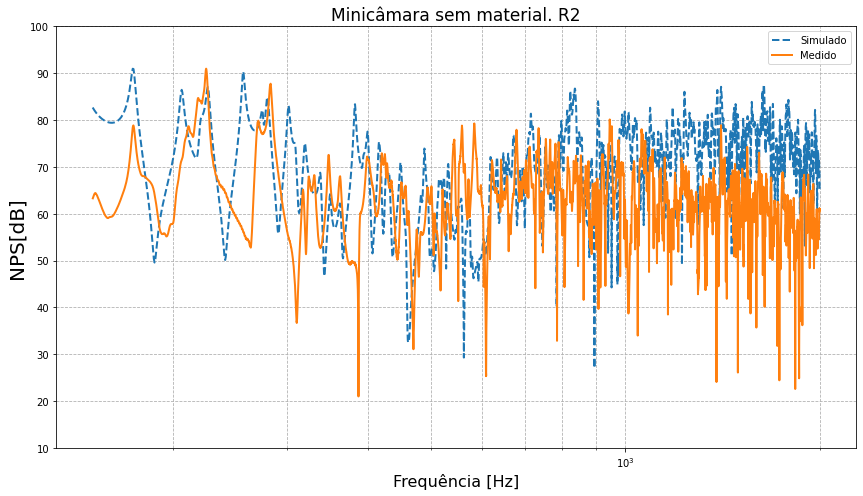

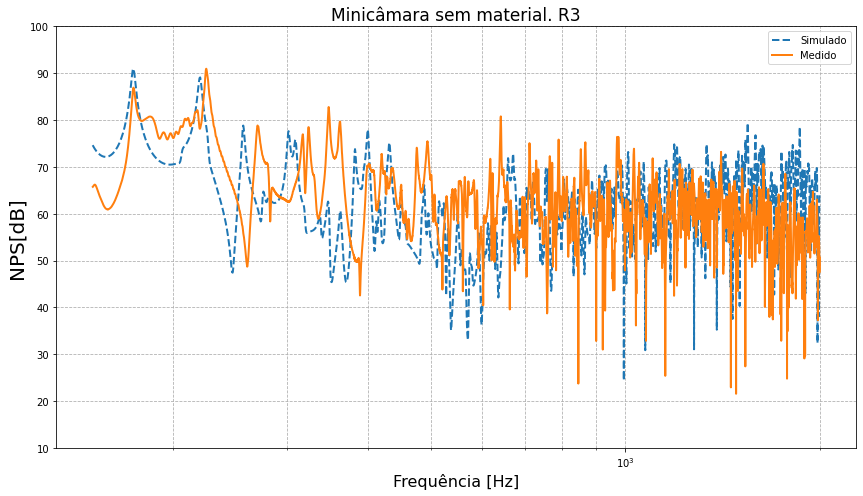

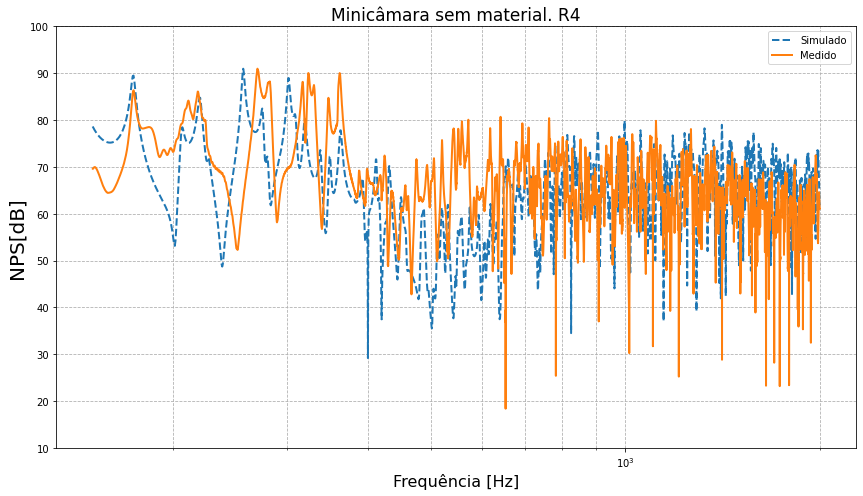

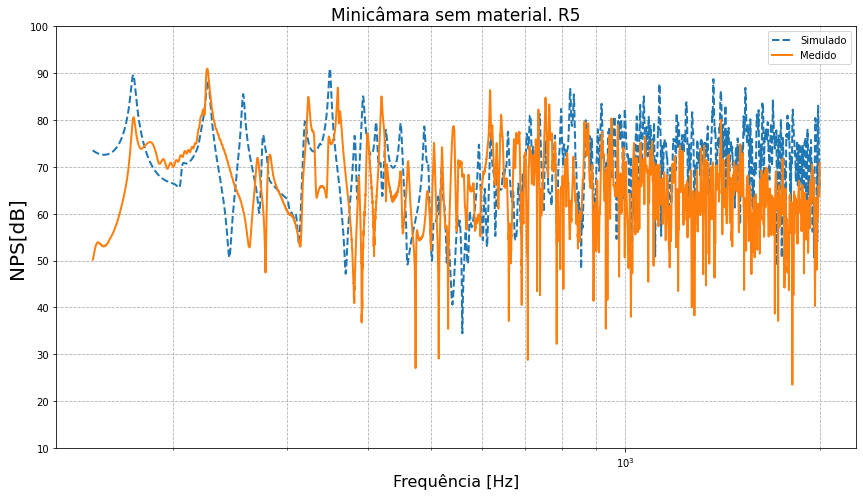

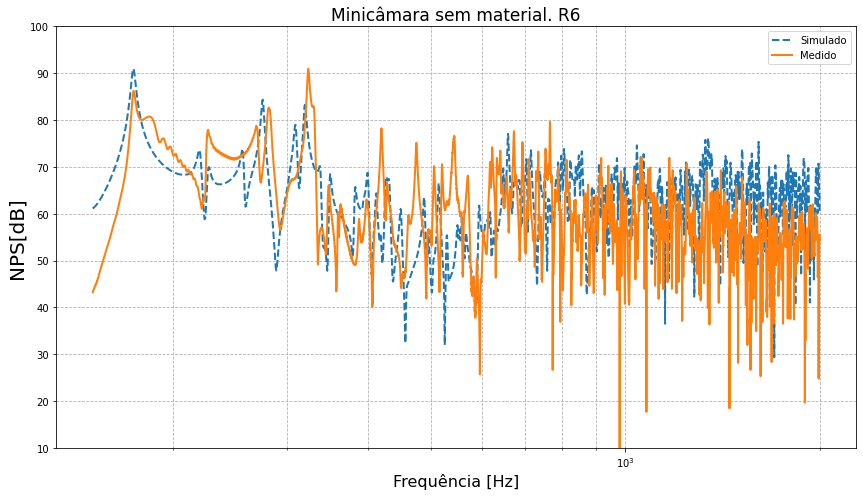

In [152]:
for n in range(0,6):  # Admitancia = 0.006
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(obj.pR[:,n]/max(abs(obj.pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_semMat['freqVector'][1981:26401,0], p2SPL(R_semMat['R_semMatfreq'][1981:26401,n]/max(abs(R_semMat['R_semMatfreq'][1981:26401,n]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show() 

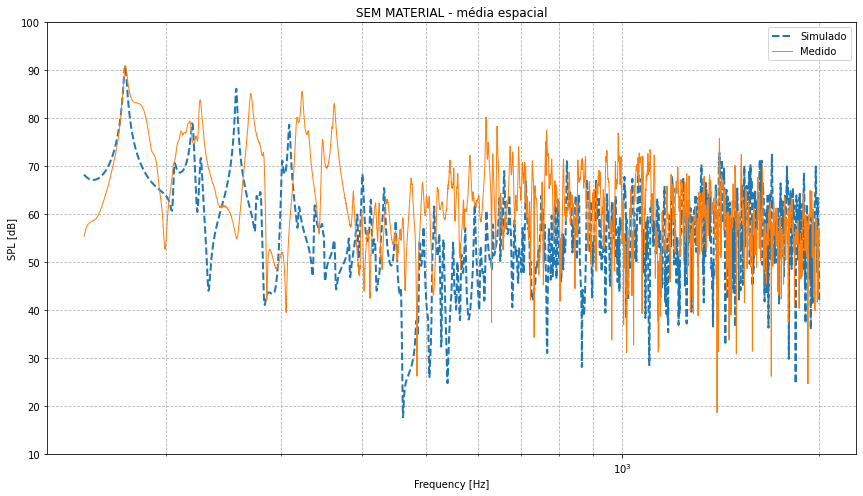

In [184]:

pR_med = np.mean(obj.pR,axis=1) # R_semMat['R_semMatfreq'][2641:7921,n]
R_med = np.mean(R_semMat['R_semMatfreq'][1981:26401],axis=1)
plt.figure(figsize=(12,7))
plt.title('SEM MATERIAL - média espacial')
plt.semilogx(obj.freq, p2SPL(pR_med/max(abs(pR_med))), linestyle='--', label='Simulado', linewidth=2)
plt.semilogx(R_semMat['freqVector'][1981:26401,0], p2SPL(R_med/max(abs(R_med))), linestyle='-', label='Medido', linewidth=1)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
# plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
plt.tight_layout()
plt.ylim((10,100))
plt.show()

### Comparação RIs dos pontos medido e simulado

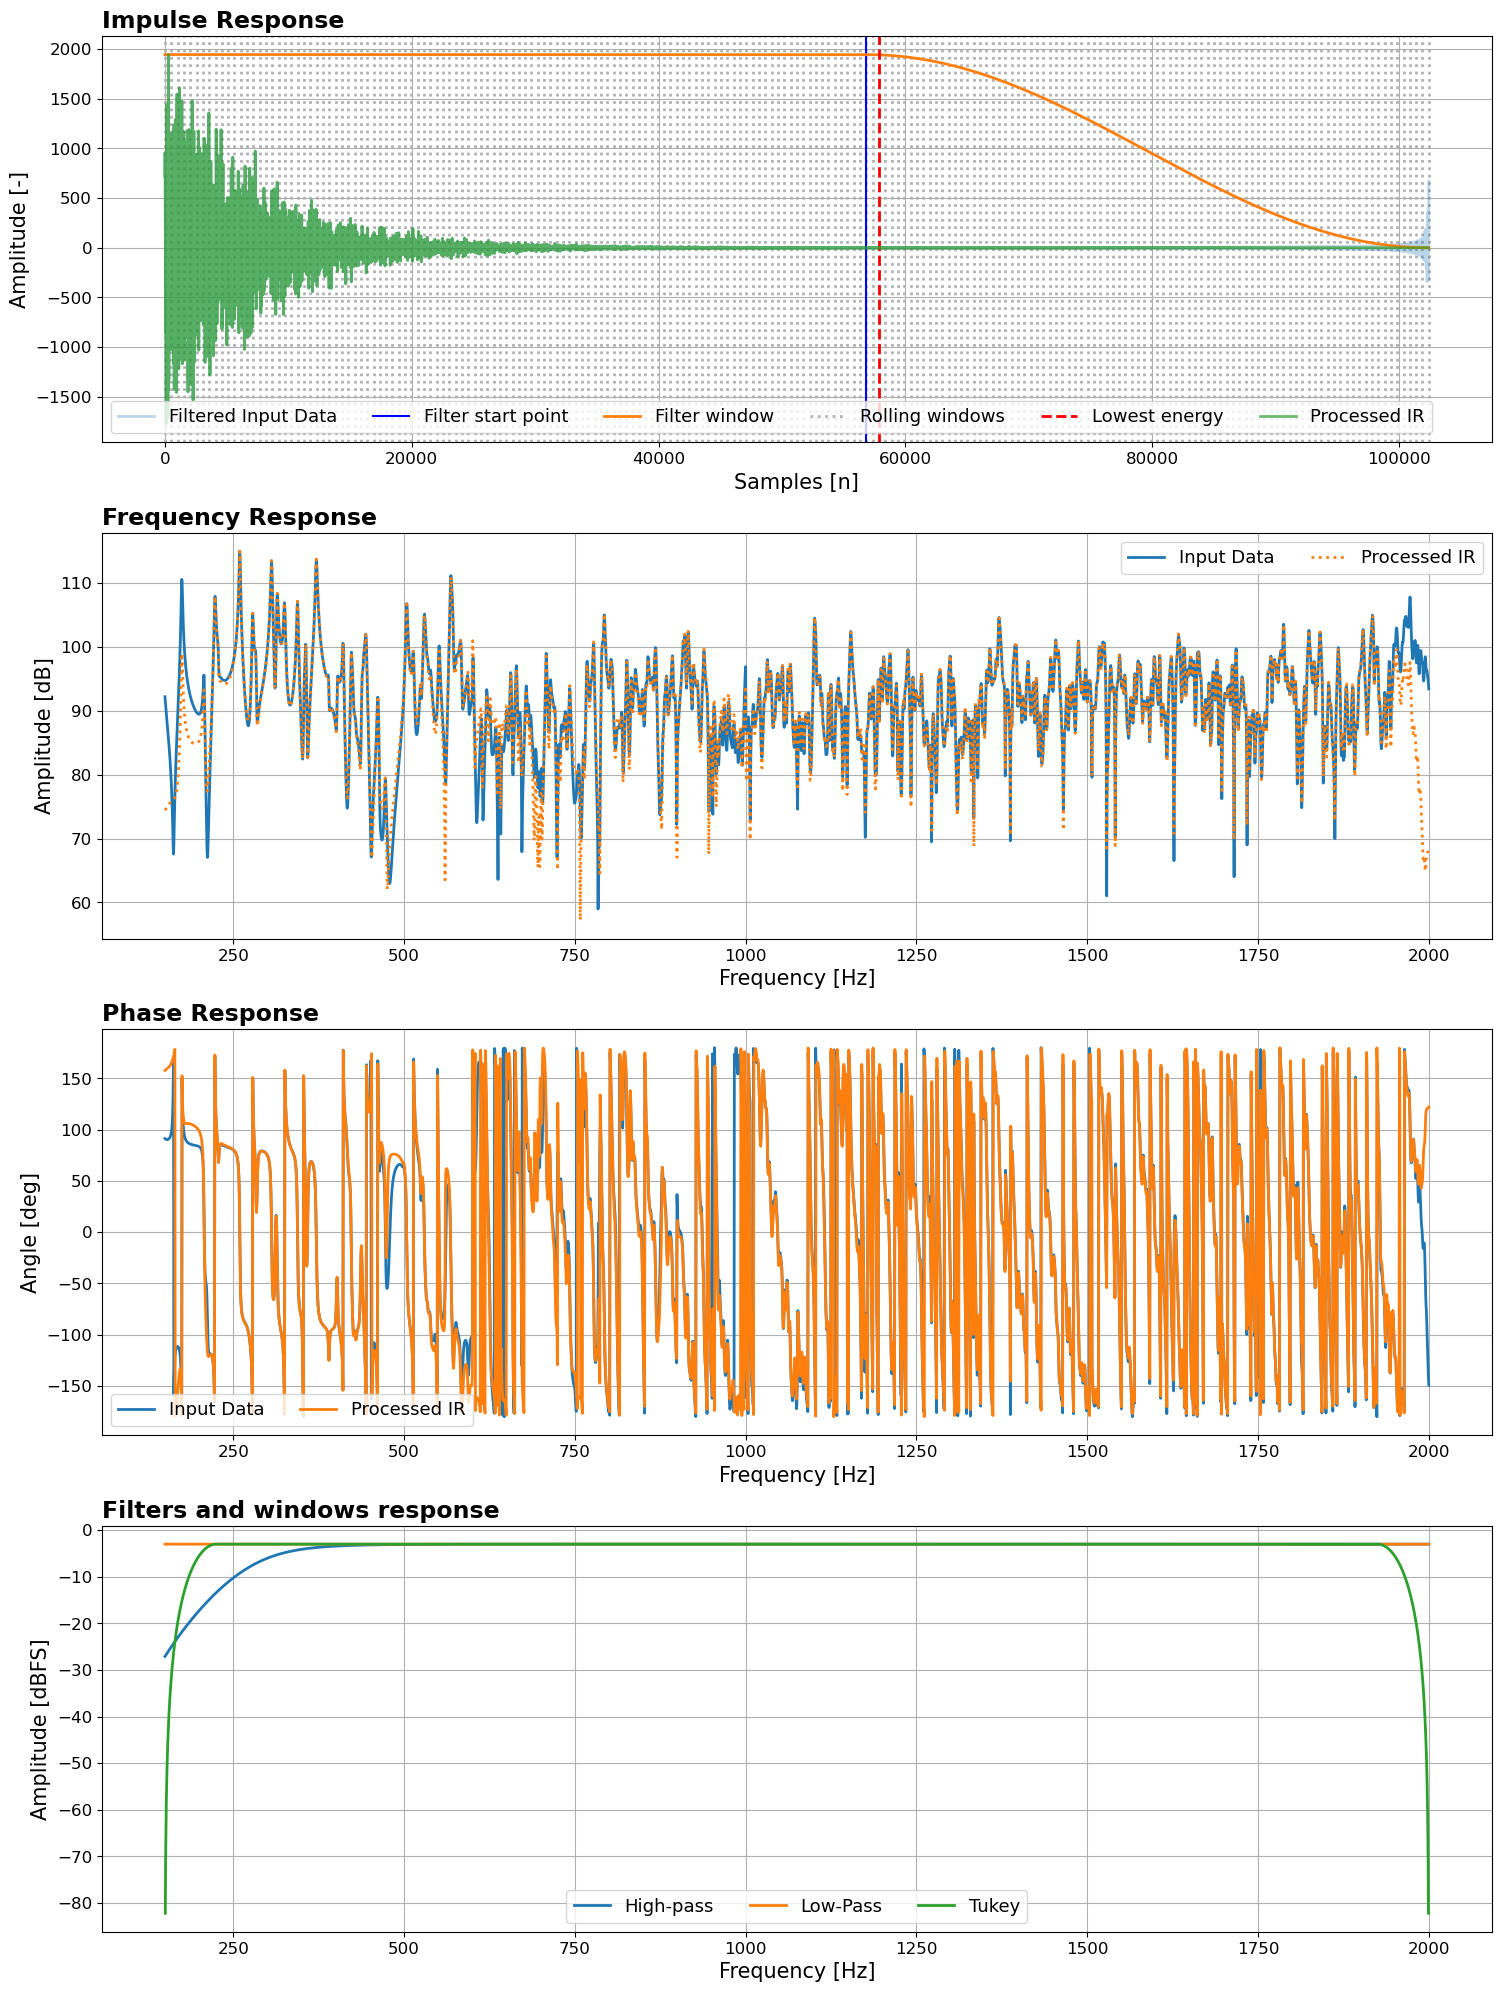

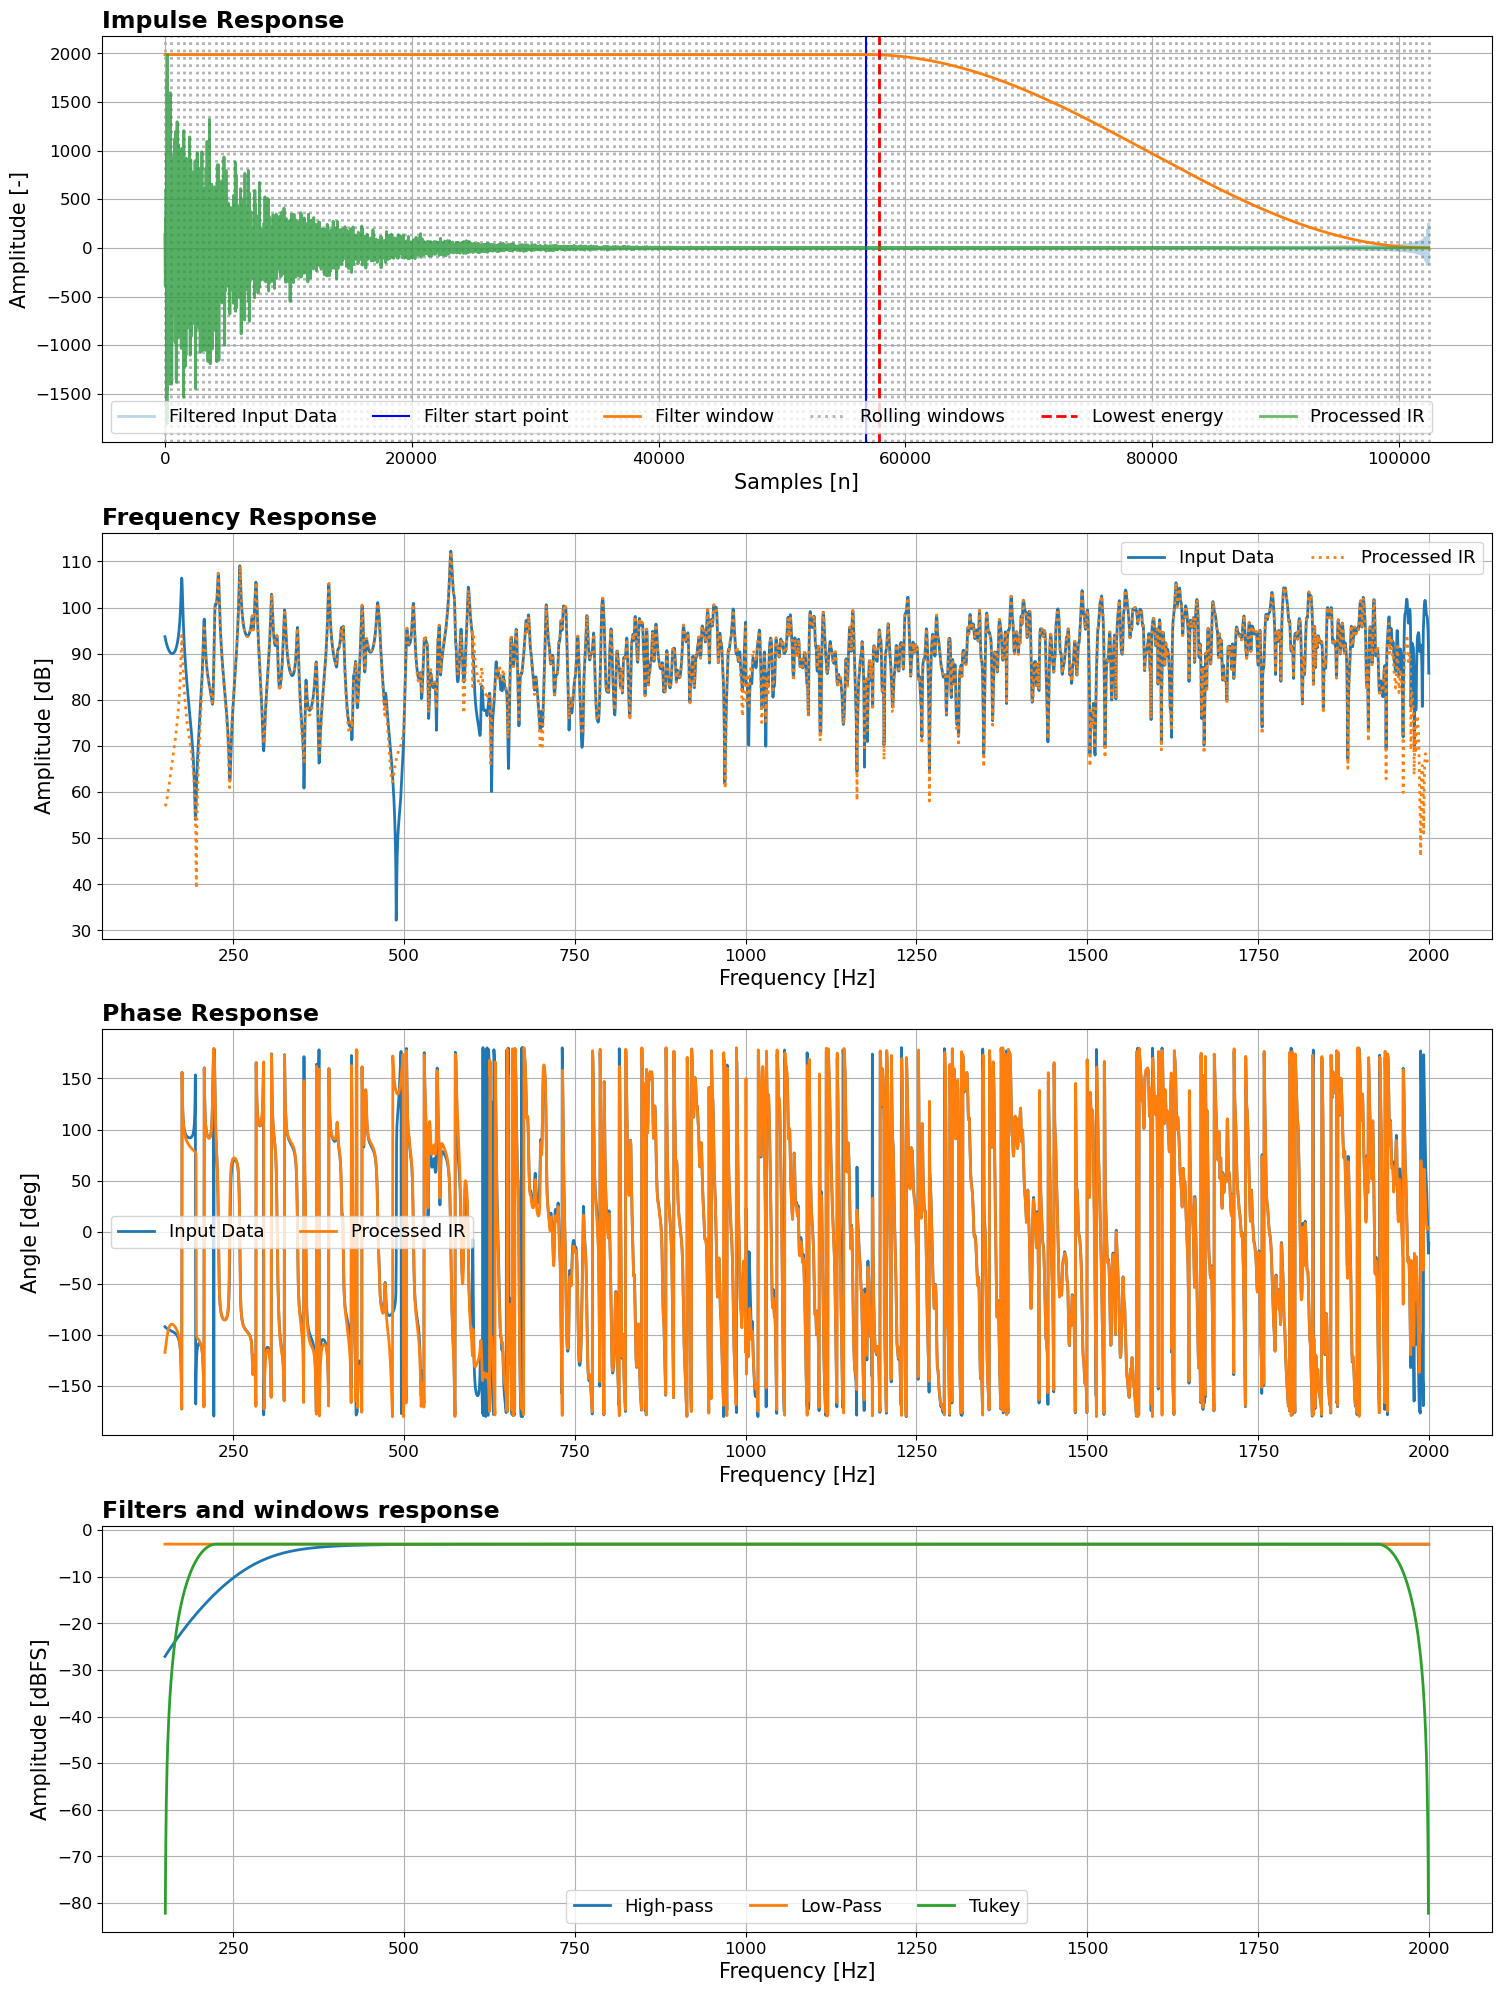

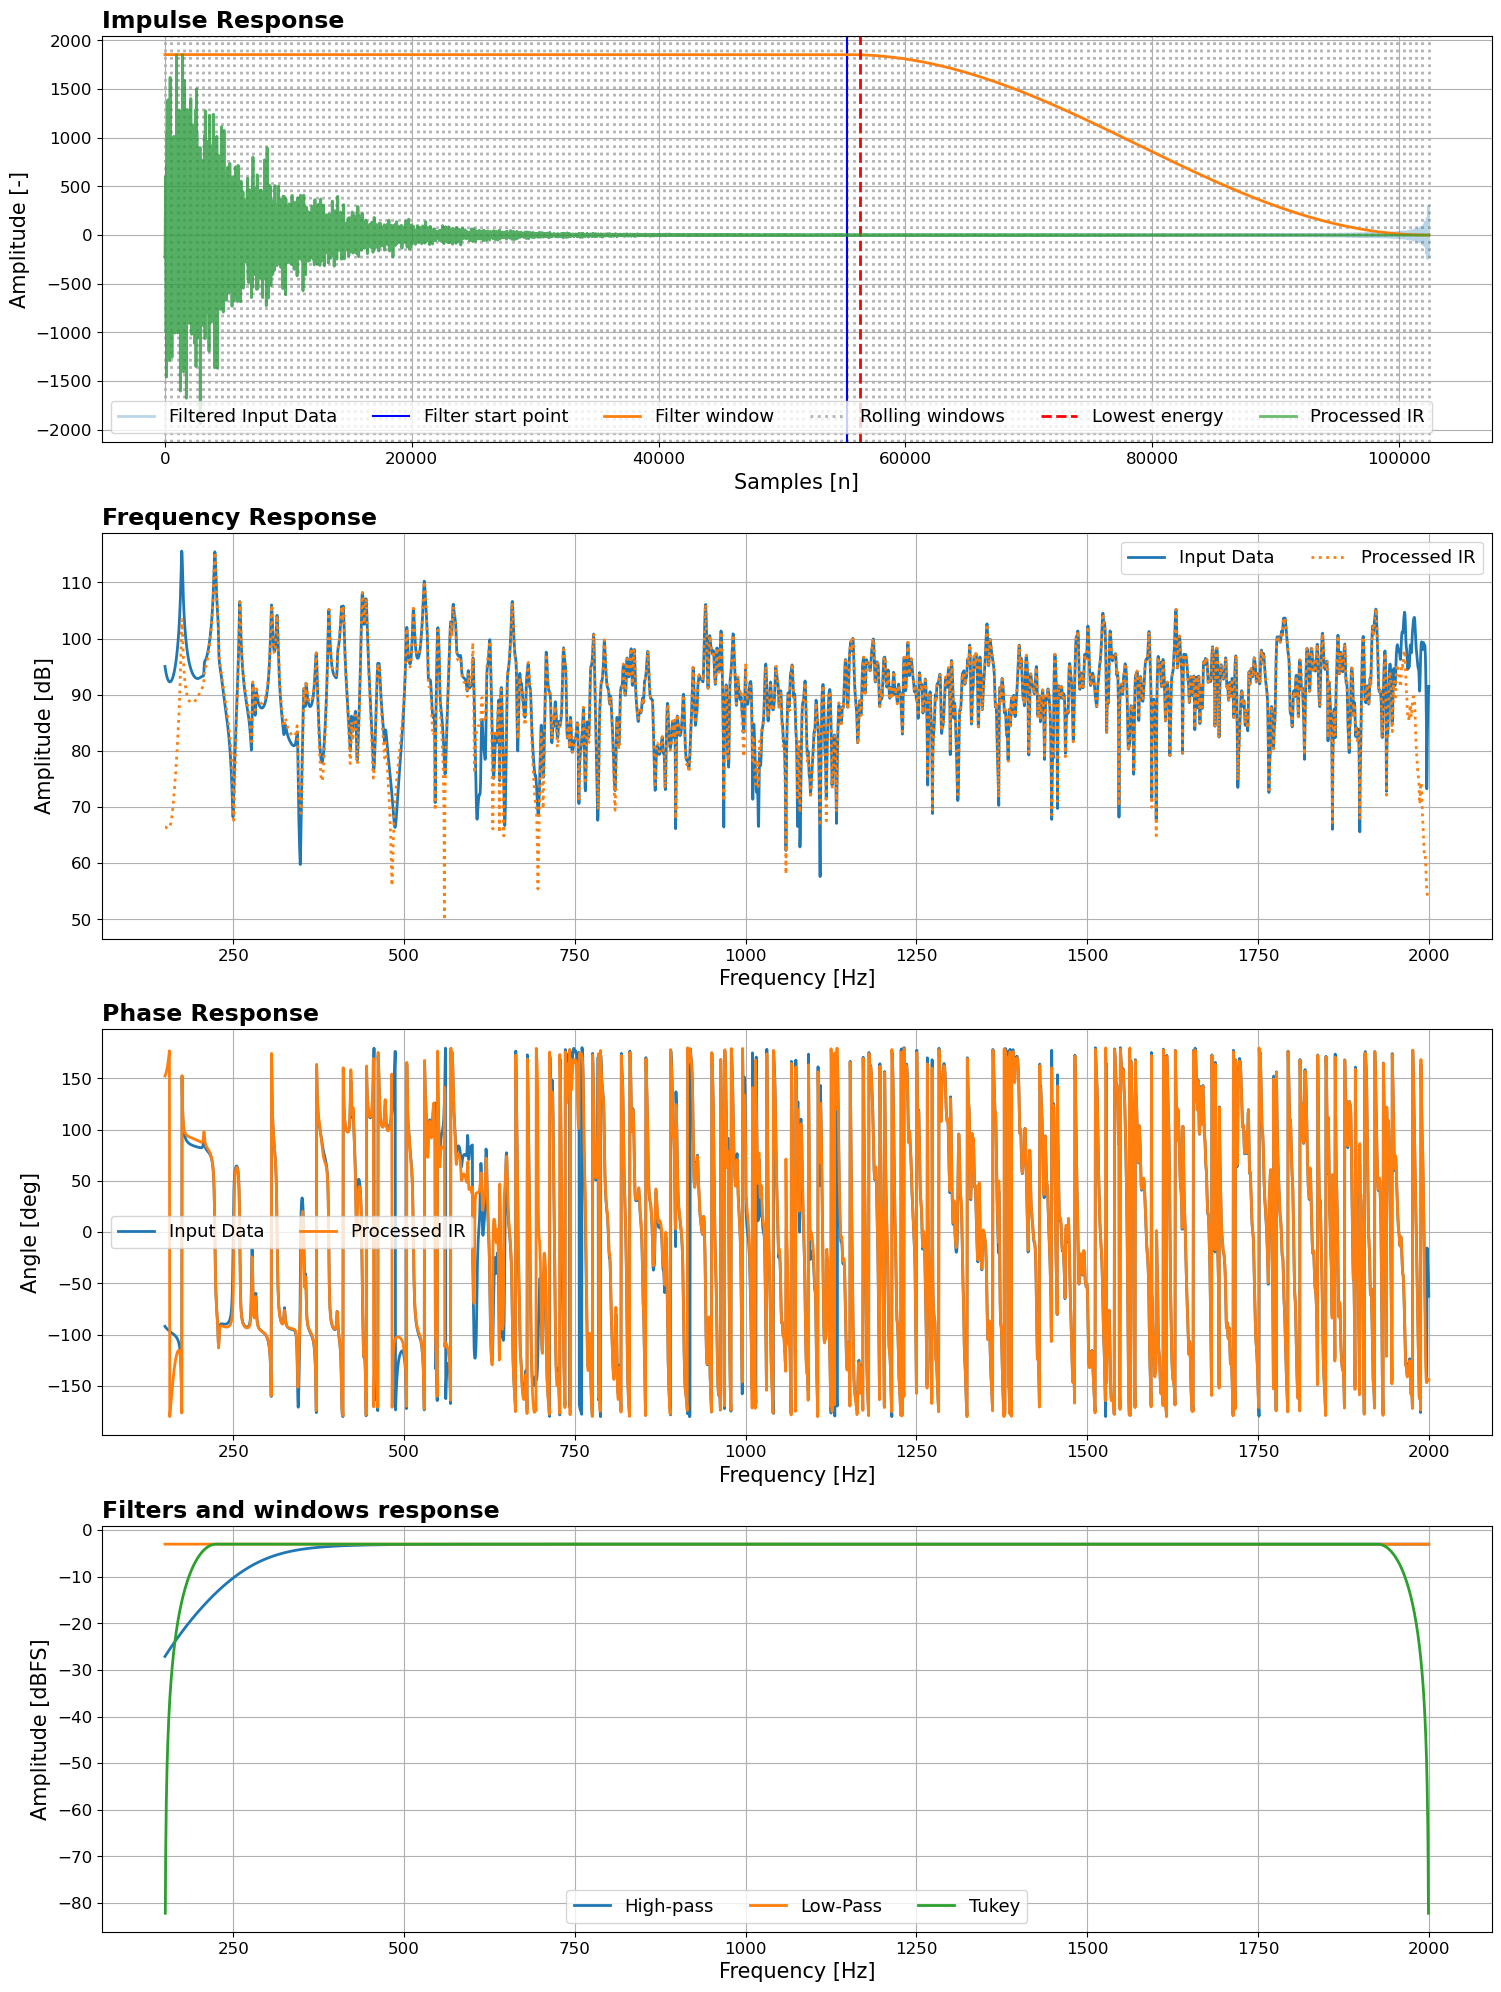

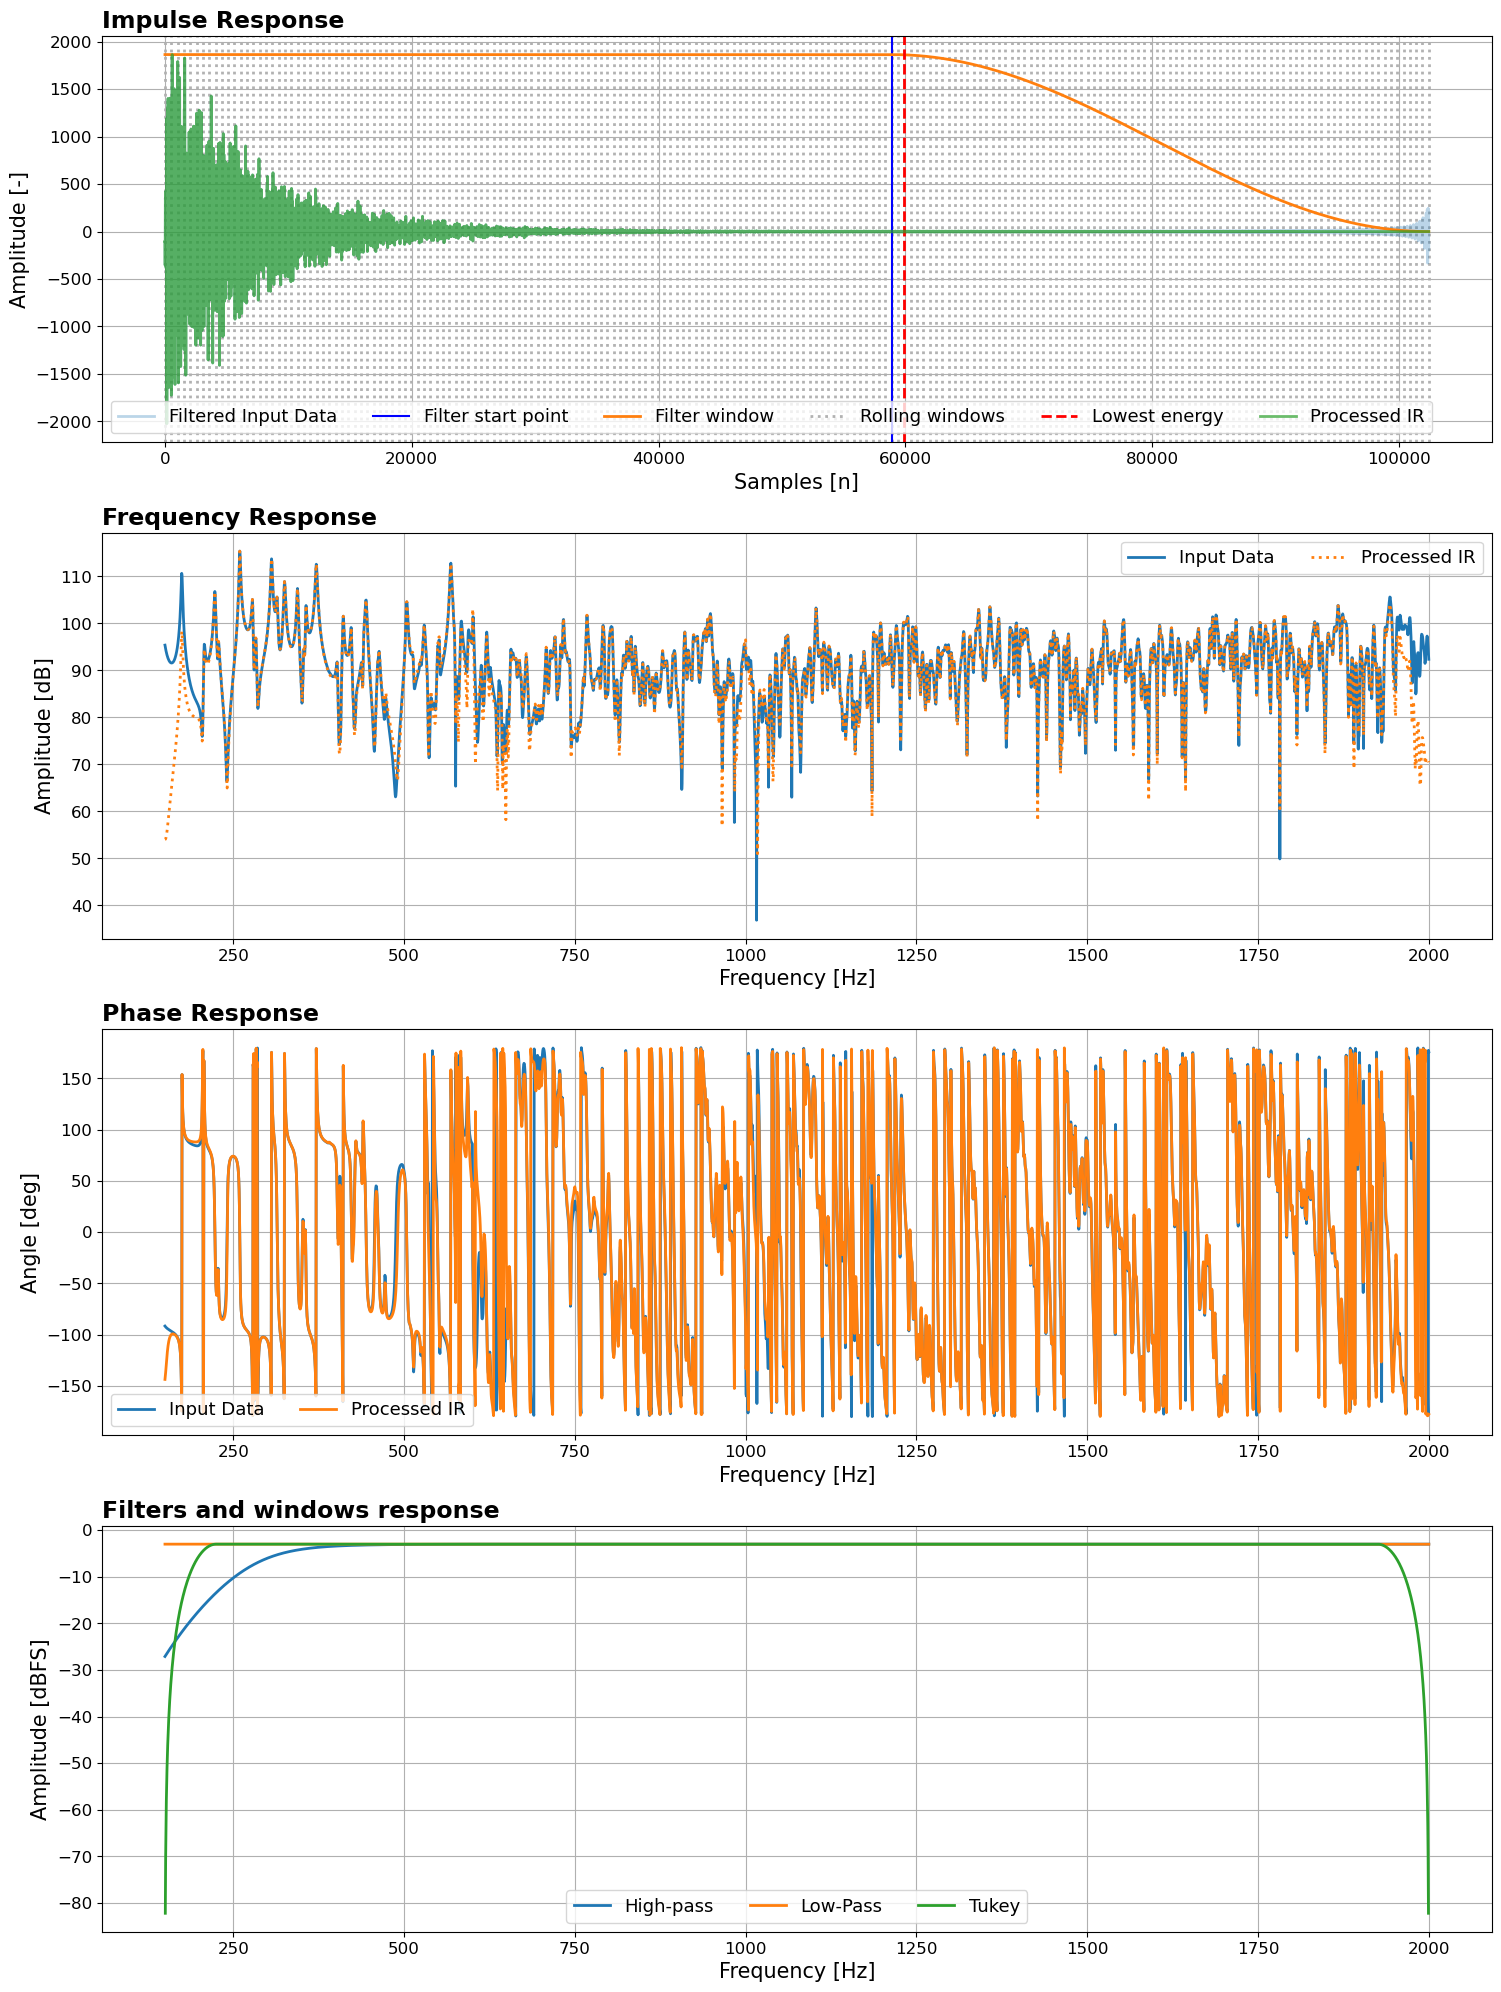

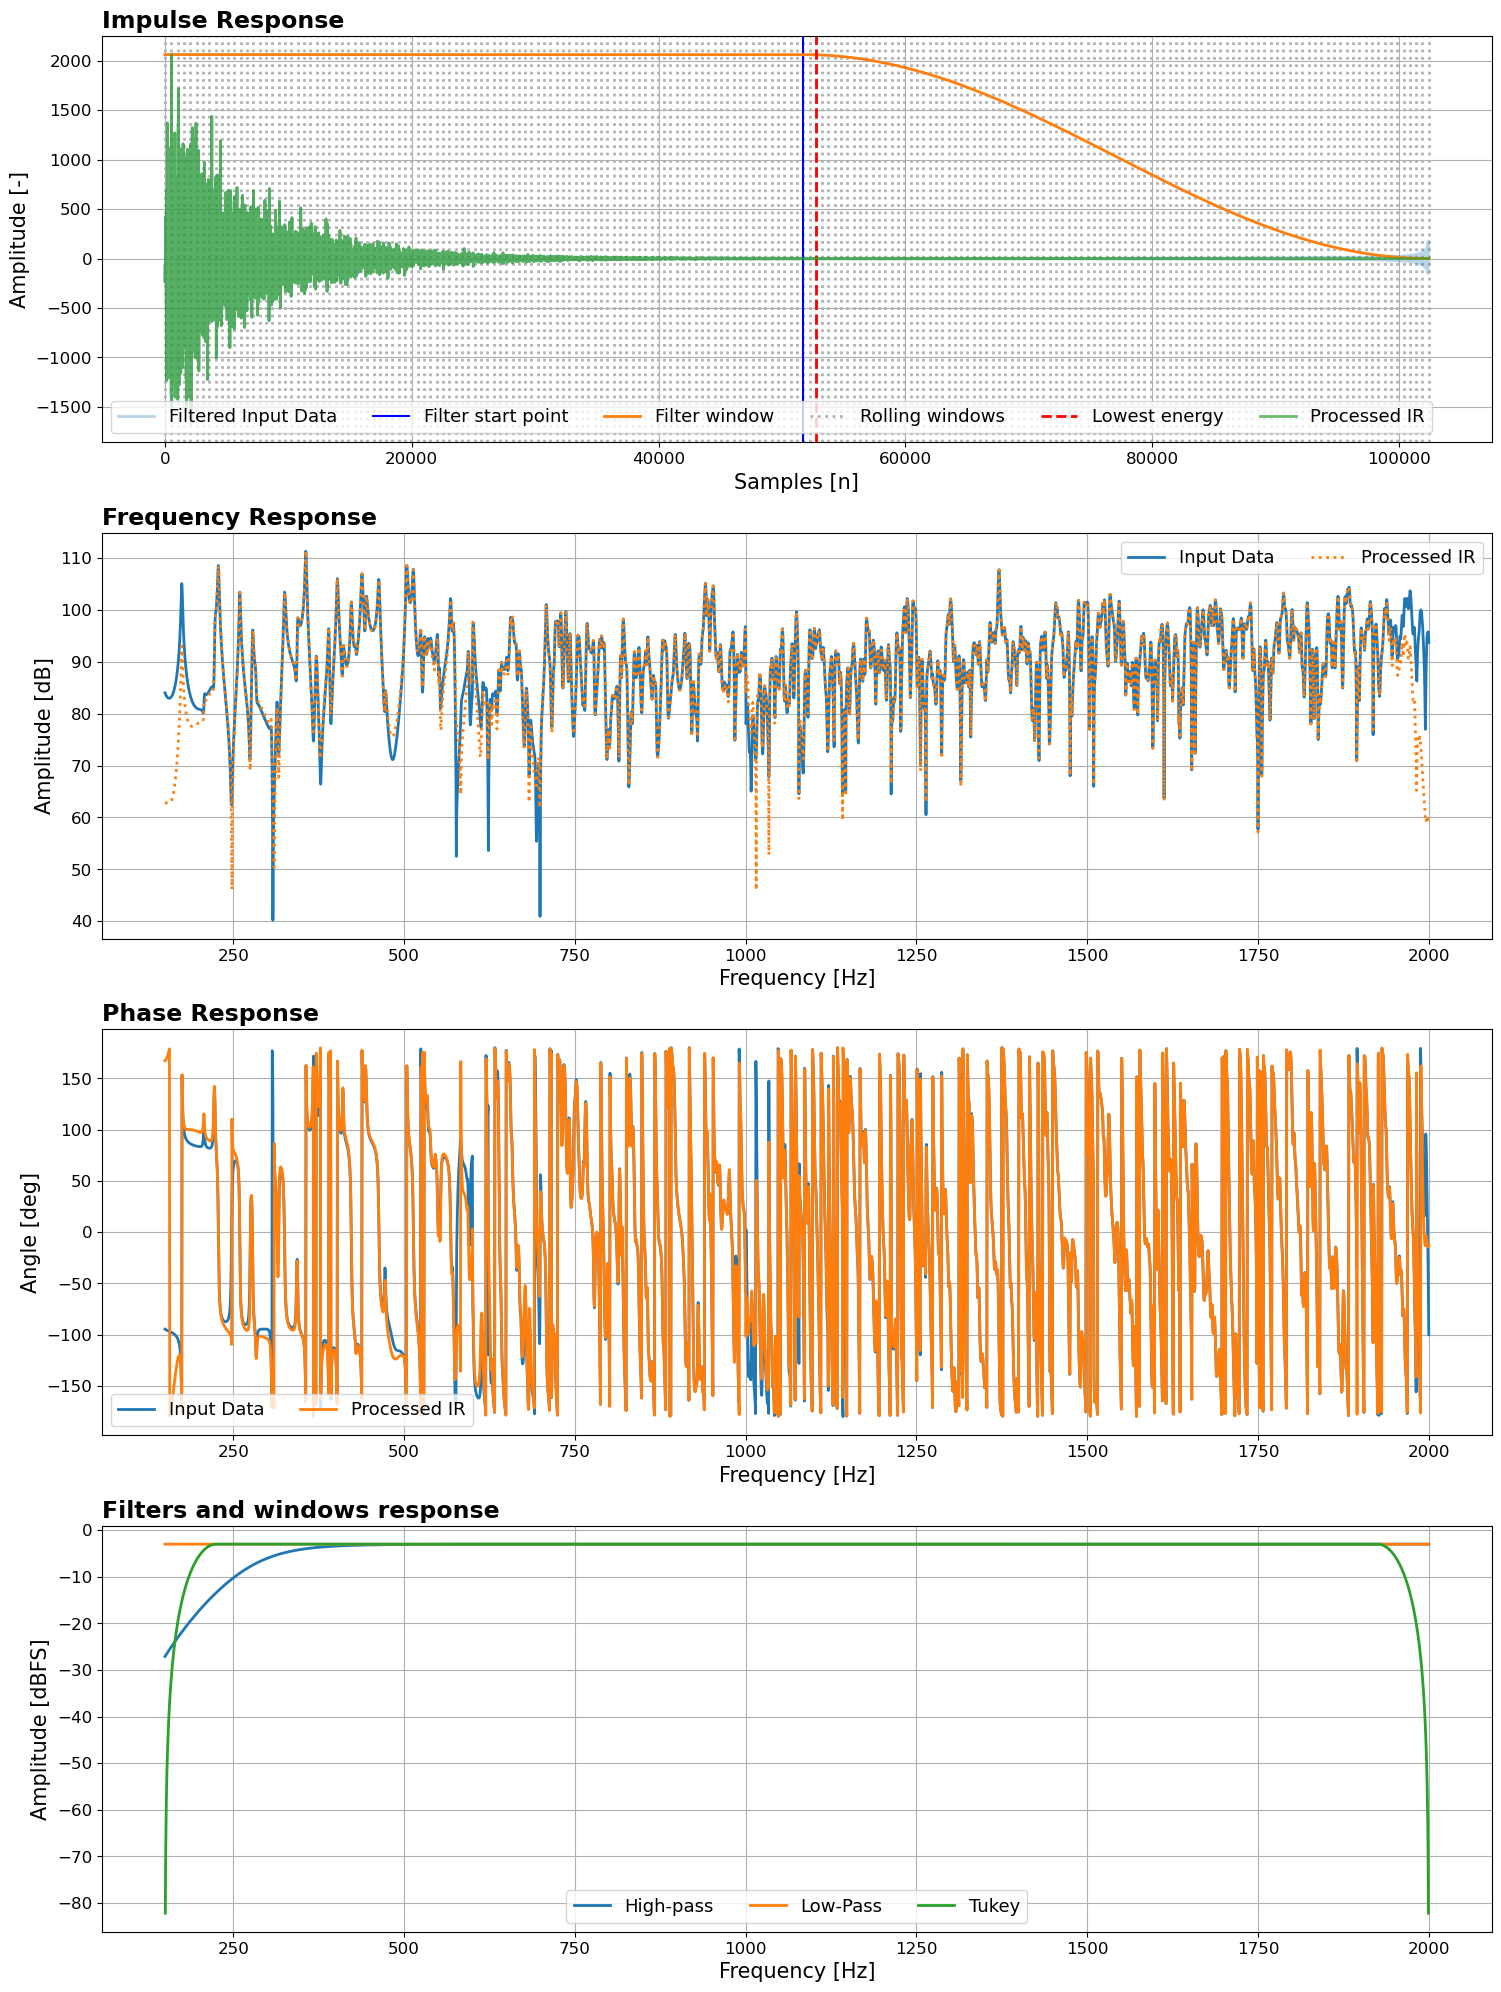

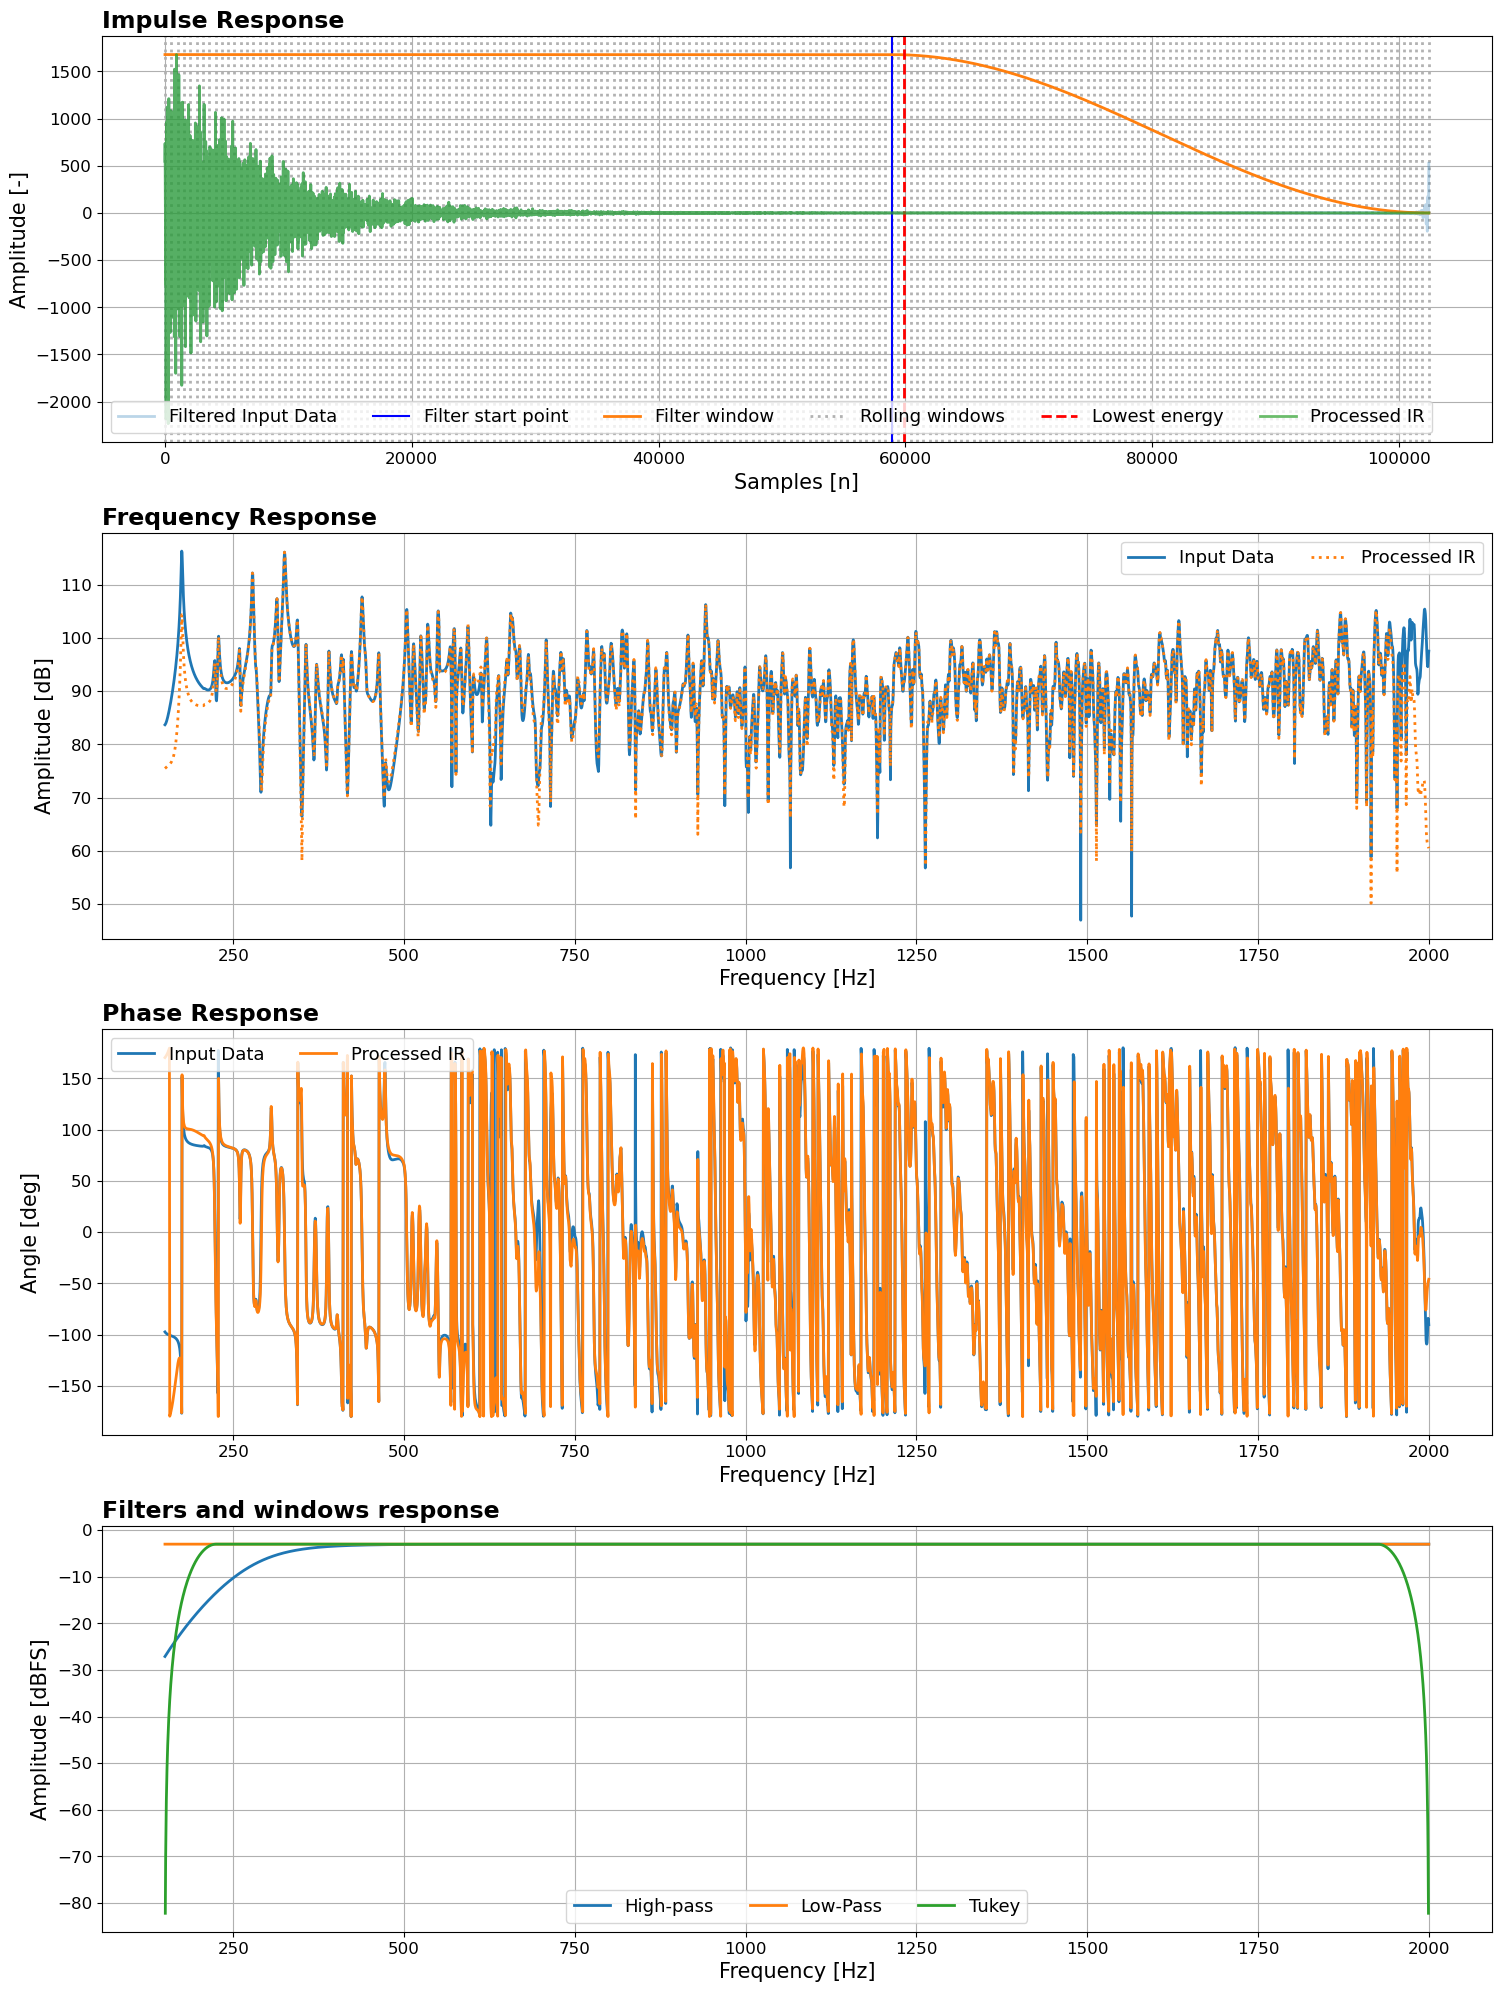

In [36]:
#%% Resposta Impulsiva
domain = fd.Domain(fmin, fmax,2,51200)
domain.alpha = 0.1
ir = np.zeros((len(RI_semMat['RIs_sz']),len(pR[0,:])))
for n in range(0,len(pR[0,:])):
    ir[:,n] = domain.compute_impulse_response(pR[:,n], view=True, irr_filters=False)


In [38]:
# Salvar os dados p importar no MATLAB
from scipy.io import savemat
savemat('D:\Meu Drive\TCC\Simulacao_computacional\minicamara-90mm\Zs_cte0_004_RIs_simuladas_fonte.mat',{'RIs':ir,'freq':AC1.freq})


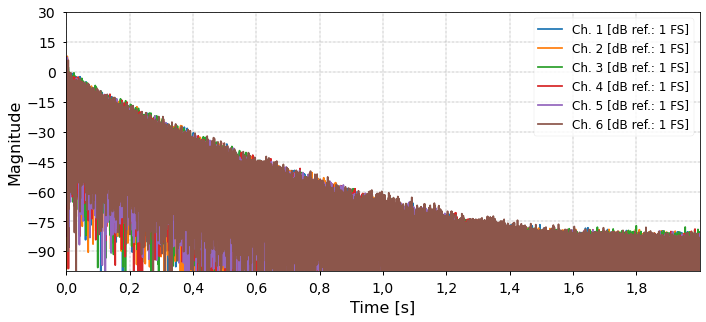

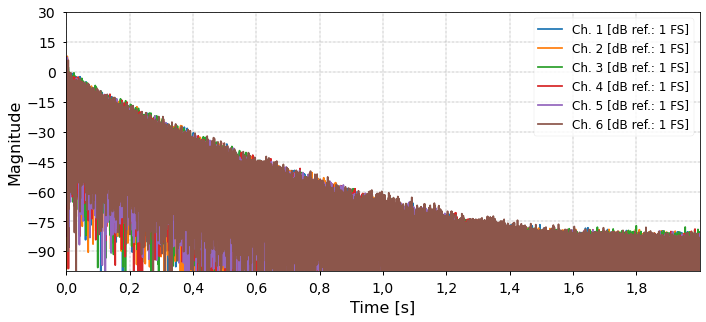

In [84]:

import pytta
txAmostragem = 51200 # [Hz]
# fftDegree = 19
# T = (2**fftDegree-1)/txAmostragem # [s]
# Cria vetor no tempo de um sinal aleatório
#meuRuido = np.random.randn(txAmostragem*T)
# SignalObj com sinal provido pelo usuário
RI_semMat = pytta.SignalObj(RI_semMat['RIs_sz'], 'time', txAmostragem) 
RI_semMat.plot_time_dB(yLim=[-100,30])

### Plote do campo de pressão

In [63]:
# Plote do campo de pressão
obj.pressure_field(frequencies = 300,renderer='browser',axis=['xy','yz'],saveFig=False,camera_angles=['diagonal_front'],extension='pdf')

G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\mini-camarareverb.iges


100%|██████████| 203/203 [00:00<00:00, 2788.65it/s]



	Elapsed time to evaluate acoustic field: 0.09 minutes

